In [56]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [57]:
data=pd.read_csv('/home/gm/Desktop/Code/ExcelR-Assignments/Association rules/book.csv')

In [58]:
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [59]:
data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
data[:].sum().sort_values(ascending=False)# top items

CookBks      862
ChildBks     846
DoItYBks     564
GeogBks      552
YouthBks     495
ArtBks       482
RefBks       429
ItalCook     227
Florence     217
ItalArt       97
ItalAtlas     74
dtype: int64

In [61]:
data.info()# no null nor any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [62]:
#There are 11 unique books sold by looking at the former data

### Data Visualization

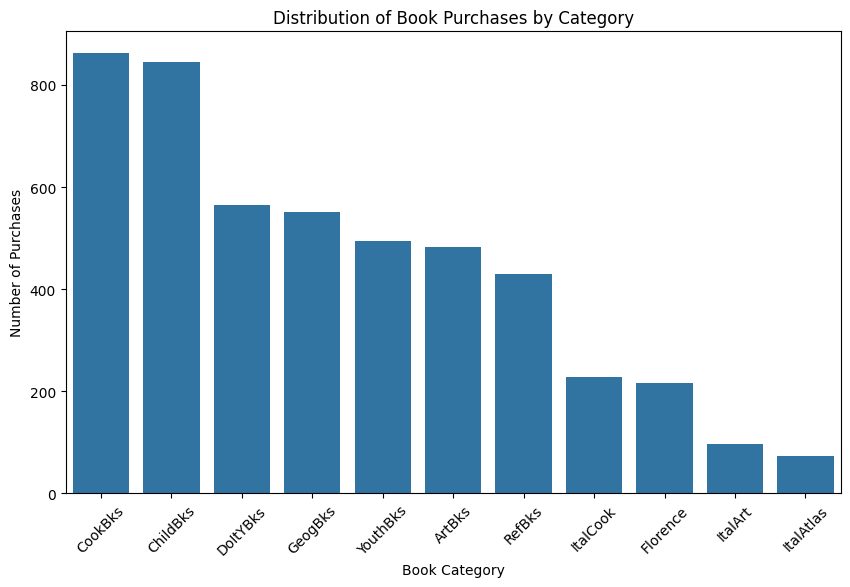

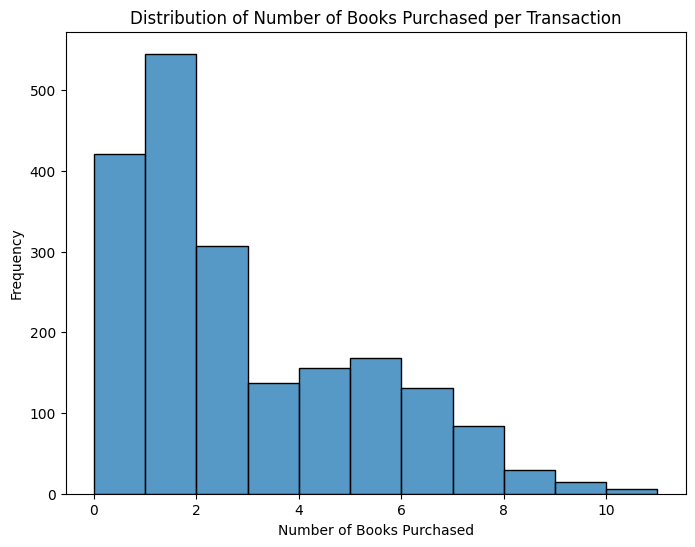

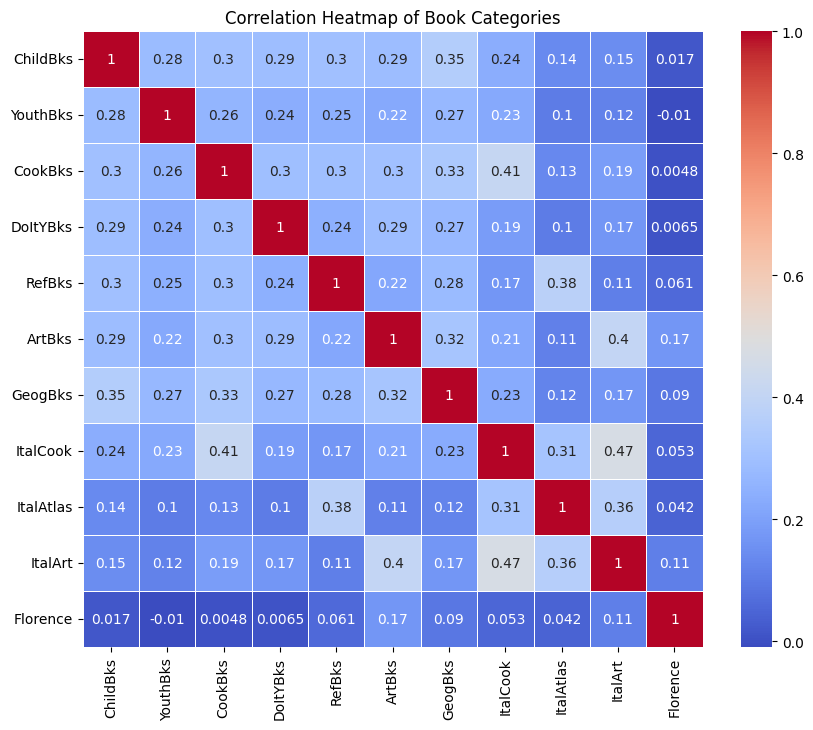

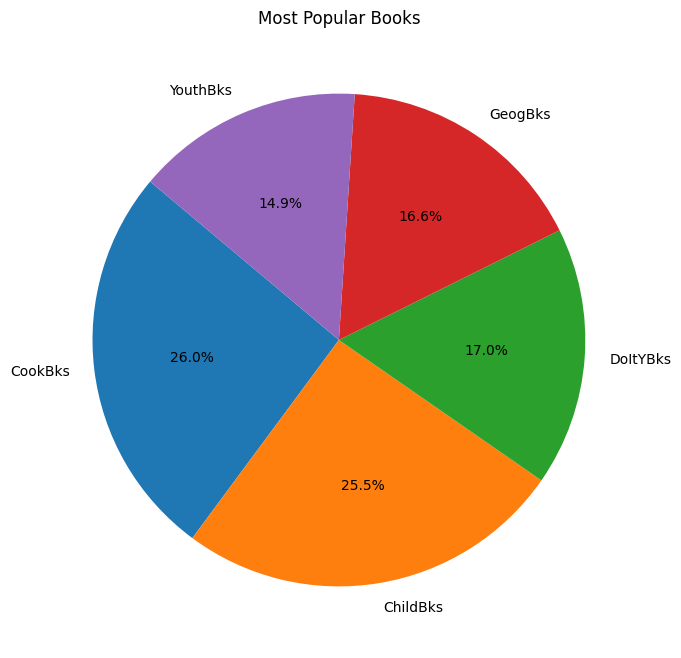

In [63]:
df=data.copy()

#Bar Plot of Book Categories
plt.figure(figsize=(10, 6))
sns.barplot(data=df.sum().sort_values(ascending=False).reset_index(), x='index', y=0)
plt.xlabel('Book Category')
plt.ylabel('Number of Purchases')
plt.title('Distribution of Book Purchases by Category')
plt.xticks(rotation=45)
plt.show()

# Histogram of Number of Books Purchased per Transaction
plt.figure(figsize=(8, 6))
sns.histplot(df.sum(axis=1), bins=range(0, df.shape[1]+1), kde=False)
plt.xlabel('Number of Books Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Books Purchased per Transaction')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Book Categories')
plt.show()

# Pie Chart of the Most Popular Books
most_popular_books = df.sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(8, 8))
plt.pie(most_popular_books, labels=most_popular_books.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Popular Books')
plt.show()

## Insights->
1) 2 most popular books are children and cook books whereas 2 least popular are Art and Atlas 
2) Mostly people purchase 2 books/transaction
3) We cannot find any meaningful insights from heatmap

### Support Values And Confidence Values

In [68]:
support_values = [0.1, 0.15, 0.2]  
confidence_values = [0.5, 0.6, 0.7]

for support in support_values:
    for confidence in confidence_values:
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        print(f"Support: {support}, Confidence: {confidence}, Number of Rules: {len(rules)}")


Support: 0.1, Confidence: 0.5, Number of Rules: 49
Support: 0.1, Confidence: 0.6, Number of Rules: 30
Support: 0.1, Confidence: 0.7, Number of Rules: 19
Support: 0.15, Confidence: 0.5, Number of Rules: 12
Support: 0.15, Confidence: 0.6, Number of Rules: 11
Support: 0.15, Confidence: 0.7, Number of Rules: 3
Support: 0.2, Confidence: 0.5, Number of Rules: 2
Support: 0.2, Confidence: 0.6, Number of Rules: 1
Support: 0.2, Confidence: 0.7, Number of Rules: 0


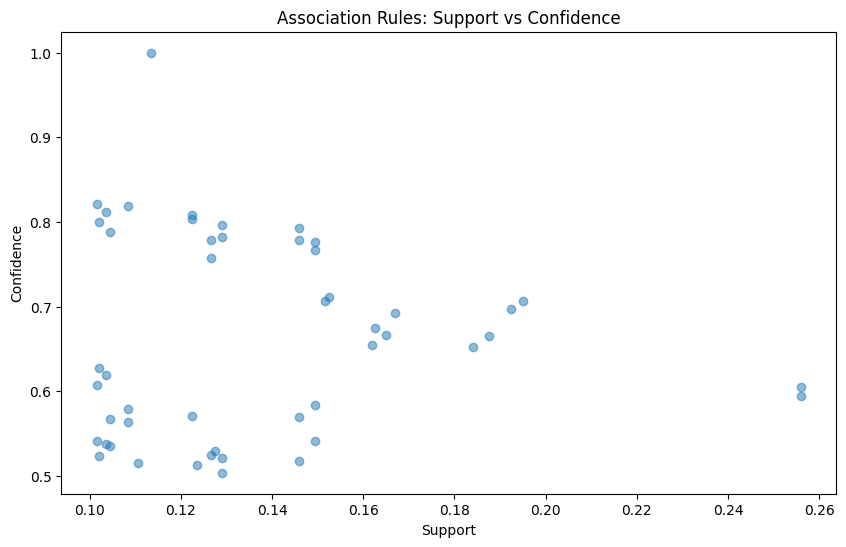

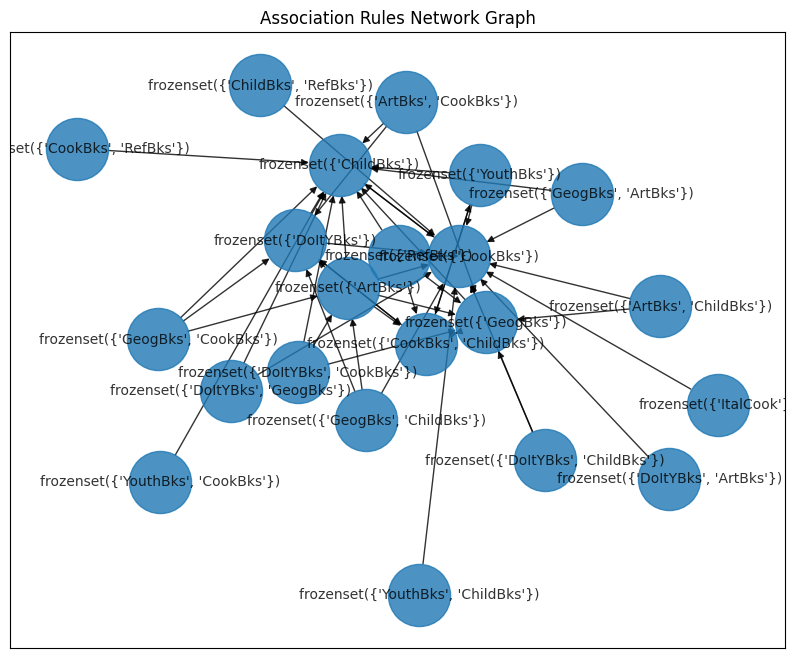

In [69]:


# Change the minimum lengthow to find the best supporh in the Apriori algorithm
min_length = 2  # Example minimum length
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Visualize the obtained rules using different plots
# For example, visualize as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()

# Alternatively, visualize as a network graph
G = nx.DiGraph()
for idx, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['support'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, font_size=10, alpha=0.8)
plt.title('Association Rules Network Graph')
plt.show()
#This is much more static so we cant gain much info

### Using Plotly to identify which set have highest Confidence and Support

In [66]:
import plotly.express as px

# Convert 'antecedents' and 'consequents' to string
rules['antecedents'] = rules['antecedents'].astype(str)
rules['consequents'] = rules['consequents'].astype(str)

# Scatter plot using Plotly
fig = px.scatter(rules, x='support', y='confidence', hover_name='antecedents', hover_data=['consequents', 'support', 'confidence'])
fig.update_layout(title='Association Rules: Support vs Confidence',
                  xaxis_title='Support', yaxis_title='Confidence')
fig.show()


### We can take a closer look at Atleast a pair of items,this will help to narrow down our observations 

In [72]:
# Convert frozensets to lists
rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

# Filter rules with more than one item in either antecedents or consequents
rules_filtered = rules[(rules['antecedents'].apply(len) > 1) | (rules['consequents'].apply(len) > 1)]

# Scatter plot using Plotly
fig = px.scatter(rules_filtered, x='support', y='confidence', hover_name='antecedents', hover_data=['consequents', 'support', 'confidence'])
fig.update_layout(title='Association Rules: Support vs Confidence (Filtered)',
                  xaxis_title='Support', yaxis_title='Confidence')
fig.show()
#These items contain atleast 3 association

Insights-
1. DoltYBooks,ChildBooks,Cookbooks have 14.6% support and 79% confidence i.e we can say that for a fairly high support(frequency) and  it means that those who purchased Doltybooks,ChildBooks are more likely to but Cookbooks

2. The above reference goes for Childbook as a consequent too. with 77% of confidence and same support

3. Childbooks and GeogeBooks also have shown high association with 19.5% support and 70% confidence in 1 100 transactions where Childbooks is the consequent.

